<a href="https://colab.research.google.com/github/themendu/covid_from_ctscan/blob/master/ct_extended.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

More details and project walkthrough was done in my [github repo](https://github.com/themendu/covid_from_ctscan).This notebook is an extension to the previous notebook "corona_detector_from_ct.ipynb".Here images were halved vertically and then augmented.

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import torch
import torchvision
import cv2
from PIL import Image

In [2]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:

import matplotlib.pyplot as plt
def cv2_imshow(a, **kwargs):
    a = a.clip(0, 255).astype('uint8')
    # cv2 stores colors as BGR; convert to RGB
    if a.ndim == 3:
        if a.shape[2] == 4:
            a = cv2.cvtColor(a, cv2.COLOR_BGRA2RGBA)
        else:
            a = cv2.cvtColor(a, cv2.COLOR_BGR2RGB)

    return plt.imshow(a, **kwargs)


In [0]:

# Read the image
img = cv2.imread("/content/gdrive/My Drive/corona/ct_dataset/ct_scan/resised/pos/"+negnames[0])
(height, width,_ )= img.shape

# Cut the image in half
width_cutoff = width // 2
s1 = img[:, :width_cutoff]
s2 = img[:, width_cutoff:]



In [0]:
negnames_ct=pd.read_excel('/content/gdrive/My Drive/corona/ct_dataset/ct_scan/negnames.xlsx')
posnames_ct=pd.read_excel('/content/gdrive/My Drive/corona/ct_dataset/ct_scan/posnames.xlsx')

In [0]:
negnames=list(negnames_ct.Name)
posnames=list(posnames_ct.Column1)

In [0]:
len(negnames)
len(posnames)

116

In [0]:
import os.path

x=0

def image_neg_halver(filenames):
  for path in filenames:
    path1="/content/gdrive/My Drive/corona/ct_dataset/ct_scan/resised/neg/"+path
    if os.path.exists(path1):
     print(path)
     img = cv2.imread(path1)
     (height, width,_ )= img.shape
     width_cutoff = width // 2
     s1 = img[:, :width_cutoff]
     s2 = img[:, width_cutoff:]
     cv2.imwrite('/content/gdrive/My Drive/corona/ct_dataset/res_halved/res_neg/'+path[:-3]+"_a"+path[-4:],s1)
     cv2.imwrite('/content/gdrive/My Drive/corona/ct_dataset/res_halved/res_neg/'+path[:-3]+"_b"+path[-4:],s2)
    else:  print(x)
  return True

In [0]:
image_neg_halver(negnames)

1070.png
1093.png
1098.png
1099.png
10_0.jpg
1115.png
112.png
11_2.jpg
120.png
1212.png
1216.png
1218.png
1221.png
1238.png
1239.png
1261.png
1277.png
1297.png
1328.png
1330.png
1333.png
1428.png
1497.png
14_2.jpg
1561.png
1577.png
158.png
15_3.jpg
166.png
176.png
177.png
17_0.jpg
1814.png
1857.png
1868.png
1876.png
1889.png
1919.png
1920.png
1922.png
1923.png
1952.png
2007.png
2039.png
2140.png
21_0.jpg
2237.png
226.png
227.png
2341.png
25_3.jpg
26.png
27.jpg
29_0.jpg
29_1.jpg
3.jpg
30_3.jpg
31.jpg
32_0.jpg
32_1.jpg
33.png
354.png
361.png
36_1.jpg
378.png
37_4.jpg
385.png
39_0.jpg
39_3.jpg
39_4.jpg
39_6.jpg
39_7.jpg
40_0.jpg
412.png
452.png
47.jpg
486.png
52_1.jpg
54_2.jpg
575.png
578.png
579.png
580.png
590.png
591.png
592.png
59_0.jpg
60.jpg
62.jpg
63_1.jpg
63_6.jpg
658.png
660.png
661.png
662.png
69_0.jpg
6_0.jpg
70_0.jpg
70_1.jpg
71_0.jpg
71_1.jpg
74.jpg
782.png
80_1.jpg
81_0.jpg
81_2.jpg
82.png
82_2.jpg
84_3.jpg
85_0.jpg
86.jpg
88.jpg
890.png
91_1.jpg
921.png
956.png


True

In [0]:
import os.path

def image_pos_halver(filenames):
  for path in filenames:
    path1="/content/gdrive/My Drive/corona/ct_dataset/ct_scan/resised/pos/"+path
    if os.path.exists(path1):
     img = cv2.imread(path1)
     (height, width,_ )= img.shape
     width_cutoff = width // 2
     s1 = img[:, :width_cutoff]
     s2 = img[:, width_cutoff:]
     cv2.imwrite('/content/gdrive/My Drive/corona/ct_dataset/res_halved/res_pos/'+str(path[:-3])+"_a"+str(path[-4:]),s1)
     cv2.imwrite('/content/gdrive/My Drive/corona/ct_dataset/res_halved/res_pos/'+str(path[:-3])+"_b"+str(path[-4:]),s2)
    else: print(x) 
  return True

In [0]:
image_pos_halver(posnames)

True

In [0]:
posnames[0]

'2019-novel-Coronavirus-severe-adult-respiratory-dist_2020_International-Jour-p3-89_0.png'

The modelling procedures and protocols were performed here are quite similar to those done in the previous notebook. Various options for modelling was explored.

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import torch
import torchvision
import cv2
from PIL import Image

In [0]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
from torchvision import transforms
TRANSFORM_IMG = transforms.Compose([
    transforms.Resize(224),
    transforms.CenterCrop(224),
    transforms.ToTensor(),transforms.Normalize(mean=[0.485, 0.456, 0.406],
              std=[0.229, 0.224, 0.225])])
path3="/content/gdrive/My Drive/corona/ct_dataset/res_halved/"



data=torchvision.datasets.ImageFolder(path3,transform=TRANSFORM_IMG)

In [0]:
data


Dataset ImageFolder
    Number of datapoints: 464
    Root location: /content/gdrive/My Drive/corona/ct_dataset/res_halved/
    StandardTransform
Transform: Compose(
               Resize(size=224, interpolation=PIL.Image.BILINEAR)
               CenterCrop(size=(224, 224))
               ToTensor()
               Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
           )

In [0]:
data.class_to_idx

{'res_neg': 0, 'res_pos': 1}

In [0]:
pos=0
neg=0

for i in range(0,464):
  (_,target)=data.__getitem__(i)
  if target==1 : pos=pos+1
  else: neg=neg+1
print(pos)
print(neg)

232
232


In [0]:
train,test =torch.utils.data.random_split(data, [384,80])


In [0]:
dataloaders = {
    'train':
    torch.utils.data.DataLoader(train,
                                batch_size=32,
                                shuffle=True,
                                num_workers=0,
                                drop_last=True),  
    'validation':
    torch.utils.data.DataLoader(test,
                                batch_size=80,
                                shuffle=False,
                                num_workers=0,
                                drop_last=False)  
}

In [0]:
# Iterate through the dataloader once
trainiter = iter(dataloaders['train'])
features, labels = next(trainiter)
features.shape, labels.shape

(torch.Size([32, 3, 224, 224]), torch.Size([32]))

In [0]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


In [0]:
import torchvision.models as models
import torch.nn as nn

model = models.resnet18(pretrained=True).to(device)

In [0]:
model

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [0]:
ct = 0
for child in model.children():
  ct += 1
  if ct < 4:
    for param in child.parameters():
        param.requires_grad = False

model.fc= nn.Sequential(
               nn.Linear(512, 128),
               nn.ReLU(inplace=True),
               nn.Dropout(p=0.4,inplace=False),
               nn.Linear(128, 2)).to(device)

In [0]:
import torch.optim as optim
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(filter(lambda p: p.requires_grad, model.parameters()),lr=0.0001, betas=(0.9, 0.999), eps=1e-08, weight_decay=0.7, amsgrad=False)

#optimizer = optim.Adam(model.fc.parameters(),lr=0.000001, betas=(0.9, 0.999), eps=1e-08, weight_decay=0.4, amsgrad=False)

#optimizer = optim.SGD(model1.fc.parameters(), lr=0.001, momentum=0,weight_decay=)

In [0]:
def recall(y_true:torch.Tensor, y_pred:torch.Tensor, is_training=False) -> torch.Tensor:

    assert y_true.ndim == 1
    assert y_pred.ndim == 1 or y_pred.ndim == 2
    
    if y_pred.ndim == 2:
        y_pred = y_pred.argmax(dim=1)
        
    
    tp = (y_true * y_pred).sum().to(torch.float32)
    fn = (y_true * (1 - y_pred)).sum().to(torch.float32)
    
    epsilon = 1e-7
    recall = tp / (tp + fn + epsilon)
  
    return recall

In [0]:
def train_model(model, criterion, optimizer, num_epochs):
    losses_train_list=[]
    losses_test_list=[]
    recall_train_list=[]
    recall_test_list=[]
    for epoch in range(num_epochs):
        print('Epoch {}/{}'.format(epoch+1, num_epochs))
        print('-' * 10)

        for phase in ['train', 'validation']:
            if phase == 'train':
                model.train()
            else:
                model.eval()

            running_loss = 0.0
            running_corrects = 0

            for inputs, labels in dataloaders[phase]:
                inputs = inputs.to(device)
                labels = labels.to(device)

                outputs = model(inputs)
                loss = criterion(outputs, labels)

                if phase == 'train':
                    optimizer.zero_grad()
                    loss.backward()
                    optimizer.step()
                _, preds = torch.max(outputs, 1)
                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)
            if phase=='train':
                           epoch_loss = running_loss /384
                           epoch_acc = running_corrects.double() /384
                           print('train recall score is : {}'.format(recall(labels.data.to('cpu'), outputs.data.to('cpu'))))
                           losses_train_list.append(epoch_loss)
                           recall_train_list.append(recall(labels.data.to('cpu'), outputs.data.to('cpu')))


            else: 
                           epoch_loss = running_loss /80
                           epoch_acc = running_corrects.double() /80
                           print('valid recall score is : {}'.format(recall(labels.data.to('cpu'), outputs.data.to('cpu'))))
                           losses_test_list.append(epoch_loss)
                           recall_test_list.append(recall(labels.data.to('cpu'), outputs.data.to('cpu')))



            print('{} loss: {:.4f}, acc: {:.4f}'.format(phase,
                                                        epoch_loss,
                                                        epoch_acc))


    return model,losses_train_list,losses_test_list,recall_train_list,recall_test_list

In [0]:
model_trained1,a1,b1,c1,d1= train_model(model_trained1, criterion, optimizer, num_epochs=1)


Epoch 1/1
----------
train recall score is : 1.0
train loss: 0.1589, acc: 0.9766
valid recall score is : 0.9777777791023254
validation loss: 0.1383, acc: 0.9750


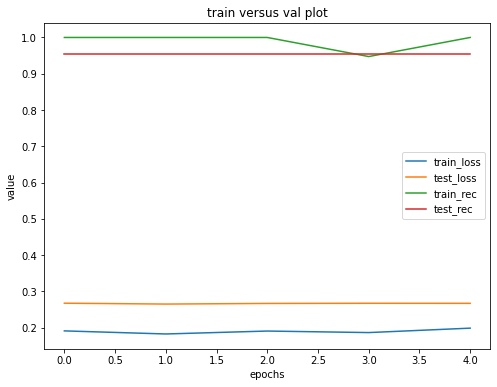

In [0]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
plt.plot(a1,label='train_loss')
plt.plot(b1,label='test_loss')
plt.plot(c1,label='train_rec')
plt.plot(d1,label='test_rec')


plt.xlabel("epochs")
plt.ylabel("value")
plt.title("train versus val plot")

plt.legend()
plt.show()

In [0]:
#torch.save(model_trained1.state_dict(), '/content/gdrive/My Drive/corona/ct_dataset/halved.h5')


In [0]:
#torch.save(model_trained1,'/content/gdrive/My Drive/corona/ct_dataset/best.pt')

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import torch
import torchvision
import cv2
from PIL import Image

In [0]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [0]:
pip install Augmentor

In [0]:
import Augmentor
p = Augmentor.Pipeline(source_directory="/content/gdrive/My Drive/corona/ct_dataset/res_halved/res_pos/",output_directory="/content/gdrive/My Drive/corona/ct_dataset/new/posn/")
p.flip_top_bottom(probability=0.1)
p.rotate(probability=0.1, max_left_rotation=5, max_right_rotation=5)
p.zoom_random(probability=0.1, percentage_area=0.95)
p.sample(500)

Executing Pipeline:   0%|          | 0/500 [00:00<?, ? Samples/s]

Initialised with 232 image(s) found.
Output directory set to /content/gdrive/My Drive/corona/ct_dataset/new/posn/.

Processing <PIL.Image.Image image mode=RGB size=284x378 at 0x7EFBBCE2AFD0>: 100%|██████████| 500/500 [00:17<00:00, 28.46 Samples/s]


In [0]:
p1 = Augmentor.Pipeline(source_directory="/content/gdrive/My Drive/corona/ct_dataset/res_halved/res_neg/",output_directory="/content/gdrive/My Drive/corona/ct_dataset/new/negn/")
p1.flip_top_bottom(probability=0.1)
p.rotate(probability=0.1, max_left_rotation=5, max_right_rotation=5)
p1.zoom_random(probability=0.1, percentage_area=0.95)
p1.sample(500)

Executing Pipeline:   0%|          | 0/500 [00:00<?, ? Samples/s]

Initialised with 232 image(s) found.
Output directory set to /content/gdrive/My Drive/corona/ct_dataset/new/negn/.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=197x276 at 0x7EFBC2C83630>: 100%|██████████| 500/500 [00:11<00:00, 44.61 Samples/s]


In [0]:
from torchvision import transforms
TRANSFORM_IMG = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),transforms.Normalize(mean=[0.485, 0.456, 0.406],
              std=[0.229, 0.224, 0.225])])
path3="/content/gdrive/My Drive/corona/ct_dataset/new/"



data=torchvision.datasets.ImageFolder(path3,transform=TRANSFORM_IMG)

In [0]:
data

Dataset ImageFolder
    Number of datapoints: 1000
    Root location: /content/gdrive/My Drive/corona/ct_dataset/new/
    StandardTransform
Transform: Compose(
               Resize(size=256, interpolation=PIL.Image.BILINEAR)
               CenterCrop(size=(224, 224))
               ToTensor()
               Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
           )

In [0]:
data.class_to_idx

{'negn': 0, 'posn': 1}

In [0]:
pos=0
neg=0

for i in range(0,2500):
  (_,target)=data.__getitem__(i)
  if target==1 : pos=pos+1
  else: neg=neg+1
print(pos)
print(neg)

In [0]:
train,test =torch.utils.data.random_split(data, [800,200])


In [0]:
dataloaders = {
    'train':
    torch.utils.data.DataLoader(train,
                                batch_size=32,
                                shuffle=True,
                                num_workers=0,
                                drop_last=True),  
    'validation':
    torch.utils.data.DataLoader(test,
                                batch_size=10,
                                shuffle=False,
                                num_workers=0,
                                drop_last=False)  
}

In [0]:
# Iterate through the dataloader once
trainiter = iter(dataloaders['train'])
features, labels = next(trainiter)
features.shape, labels.shape

(torch.Size([32, 3, 224, 224]), torch.Size([32]))

In [0]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


In [0]:
import torchvision.models as models
import torch.nn as nn

model = models.resnet18(pretrained=False).to(device)

In [0]:
model

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [0]:
ct = 0
for child in model.children():
  ct += 1
  if ct < 1:
    for param in child.parameters():
        param.requires_grad = False


In [0]:
model.fc= nn.Sequential(
               nn.Linear(512, 128),
               nn.ReLU(inplace=True),
               nn.Dropout(p=0.3,inplace=False),
               nn.Linear(128, 2)).to(device)

In [0]:
import torch.optim as optim
criterion = nn.CrossEntropyLoss()
#optimizer = optim.Adam(filter(lambda p: p.requires_grad, model.parameters()),lr=0.0001, betas=(0.9, 0.999), eps=1e-08, weight_decay=0.6, amsgrad=False)

optimizer = optim.Adam(model.parameters(),lr=0.000005, betas=(0.9, 0.999), eps=1e-08, weight_decay=0.5, amsgrad=False)

#optimizer = optim.SGD(model1.fc.parameters(), lr=0.001, momentum=0,weight_decay=)

In [0]:
def recall(y_true:torch.Tensor, y_pred:torch.Tensor, is_training=False) -> torch.Tensor:

    assert y_true.ndim == 1
    assert y_pred.ndim == 1 or y_pred.ndim == 2
    
    if y_pred.ndim == 2:
        y_pred = y_pred.argmax(dim=1)
        
    
    tp = (y_true * y_pred).sum().to(torch.float32)
    fn = (y_true * (1 - y_pred)).sum().to(torch.float32)
    
    epsilon = 1e-7
    recall = tp / (tp + fn + epsilon)
  
    return recall

In [0]:
def train_model(model, criterion, optimizer, num_epochs):
    losses_train_list=[]
    losses_test_list=[]
    recall_train_list=[]
    recall_test_list=[]
    for epoch in range(num_epochs):
        print('Epoch {}/{}'.format(epoch+1, num_epochs))
        print('-' * 10)

        for phase in ['train', 'validation']:
            if phase == 'train':
                model.train()
            else:
                model.eval()

            running_loss = 0.0
            running_corrects = 0

            for inputs, labels in dataloaders[phase]:
                inputs = inputs.to(device)
                labels = labels.to(device)

                outputs = model(inputs)
                loss = criterion(outputs, labels)

                if phase == 'train':
                    optimizer.zero_grad()
                    loss.backward()
                    optimizer.step()
                _, preds = torch.max(outputs, 1)
                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)
            if phase=='train':
                           epoch_loss = running_loss /800
                           epoch_acc = running_corrects.double() /800
                           print('train recall score is : {}'.format(recall(labels.data.to('cpu'), outputs.data.to('cpu'))))
                           losses_train_list.append(epoch_loss)
                           recall_train_list.append(recall(labels.data.to('cpu'), outputs.data.to('cpu')))


            else: 
                           epoch_loss = running_loss /200
                           epoch_acc = running_corrects.double() /200
                           print('valid recall score is : {}'.format(recall(labels.data.to('cpu'), outputs.data.to('cpu'))))
                           losses_test_list.append(epoch_loss)
                           recall_test_list.append(recall(labels.data.to('cpu'), outputs.data.to('cpu')))



            print('{} loss: {:.4f}, acc: {:.4f}'.format(phase,
                                                        epoch_loss,
                                                        epoch_acc))


    return model,losses_train_list,losses_test_list,recall_train_list,recall_test_list

In [0]:
model_trained1,a1,b1,c1,d1= train_model(model_trained1, criterion, optimizer, num_epochs=4)


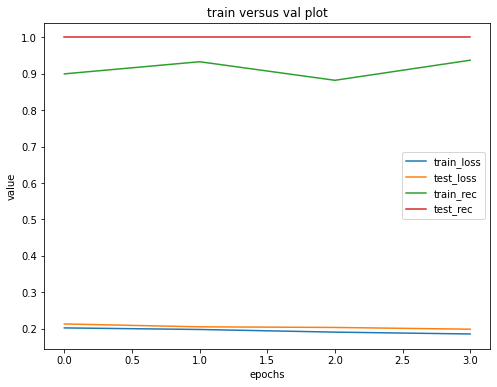

In [0]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
plt.plot(a1,label='train_loss')
plt.plot(b1,label='test_loss')
plt.plot(c1,label='train_rec')
plt.plot(d1,label='test_rec')


plt.xlabel("epochs")
plt.ylabel("value")
plt.title("train versus val plot")

plt.legend()
plt.show()

In [0]:
#torch.save(model_trained1,'/content/gdrive/My Drive/corona/ct_dataset/aug.pt')

In [0]:
#torch.save(model_trained1,'/content/gdrive/My Drive/corona/ct_dataset/notune.pt')

In [0]:
#torch.save(model_trained1,'/content/gdrive/My Drive/corona/ct_dataset/notune1.pt')

To check the model please run the below code snippets.

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import torch
import torchvision
import cv2
from PIL import Image

In [2]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


Please change your location of the model and dataset accordingly by adding the given dataset [link](https://drive.google.com/drive/folders/1oz2m4DQ4UsKggPm76KKFTqH8Lt8JcxuF) to your drive.

In [0]:
#**********************************************************************************************
model=torch.load('/content/gdrive/My Drive/corona/ct_dataset/ct_scan/final_model.pt')
#**********************************************************************************************

In [0]:
device="cpu"

In [0]:
model=model.to(device)

In [0]:
from torchvision import transforms
TRANSFORM_IMG = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),transforms.Normalize(mean=[0.485, 0.456, 0.406],
              std=[0.229, 0.224, 0.225])])


#**********************************************************************************************
path3="/content/gdrive/My Drive/corona/ct_dataset/ct_scan/new/"
data=torchvision.datasets.ImageFolder(path3,transform=TRANSFORM_IMG)
#**********************************************************************************************

Since holding all 1000 images is difficult.Let us make batches of size 200 and test them.So the whole dataset is countered 5 times.

In [0]:
dataloaders = {
    'train':
    torch.utils.data.DataLoader(data,
                                batch_size=200,
                                shuffle=True,
                                num_workers=0,
                                drop_last=False),    
}
 

In [0]:
def recall(y_true:torch.Tensor, y_pred:torch.Tensor, is_training=False) -> torch.Tensor:

    assert y_true.ndim == 1
    assert y_pred.ndim == 1 or y_pred.ndim == 2
    
    if y_pred.ndim == 2:
        y_pred = y_pred.argmax(dim=1)
        
    
    tp = (y_true * y_pred).sum().to(torch.float32)
    fn = (y_true * (1 - y_pred)).sum().to(torch.float32)
    
    epsilon = 1e-8
    recall = tp / (tp + fn + epsilon)
  
    return recall

In [11]:
phase='train'
model.eval()
import torch.optim as optim
import torch.nn as nn
criterion = nn.CrossEntropyLoss()
for inputs, labels in dataloaders[phase]:
                running_loss=0
                running_corrects=0
                inputs = inputs.to(device)
                labels = labels.to(device)
                outputs = model(inputs)
                _, preds = torch.max(outputs, 1)
                loss = criterion(outputs, labels)
                print(loss)
                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)
                epoch_acc = running_corrects.double() /200
                print(epoch_acc)
                print("recall score is"+str(recall(labels.data.to('cpu'), outputs.data.to('cpu'))))

tensor(0.1560, grad_fn=<NllLossBackward>)
tensor(0.9600, dtype=torch.float64)
recall score istensor(0.9175)
tensor(0.1773, grad_fn=<NllLossBackward>)
tensor(0.9550, dtype=torch.float64)
recall score istensor(0.9082)
tensor(0.1874, grad_fn=<NllLossBackward>)
tensor(0.9600, dtype=torch.float64)
recall score istensor(0.9208)
tensor(0.1570, grad_fn=<NllLossBackward>)
tensor(0.9800, dtype=torch.float64)
recall score istensor(0.9574)
tensor(0.1525, grad_fn=<NllLossBackward>)
tensor(0.9800, dtype=torch.float64)
recall score istensor(0.9636)


In [0]:
#average recall score of 0.93 (taken over all 5 epochs,though the overall recall score maynot be the average).
#average accuracy of 0.967 (taken over all 5 epochs final accuracy would be same as the averaged one).
#average loss function per sample is 0.16 (taken over all 5 epochs final epoch loss would be same as the averaged one).
#Note that the entire 1000 samples are being tested here,so the results are a bit different here than reported.

Testing code ends here.

In [3]:
import time
while 1:
  time.sleep(300)

KeyboardInterrupt: ignored